<a href="https://colab.research.google.com/github/castorhyun/DeepLearningZeroToAll/blob/master/CIFAR10_CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
import tensorflow as tf


In [3]:
from keras.datasets import cifar10
from keras import initializers

import copy

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8


In [6]:
import keras.utils

one_hot_labels = keras.utils.to_categorical(y_train, num_classes=10)

CNN layer 만들기

In [7]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers.normalization import BatchNormalization
import keras.utils
from keras import layers , activations
from keras.optimizers import SGD



from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Hyper Parameters



In [ ]:

img_rows = 32
img_cols = 32

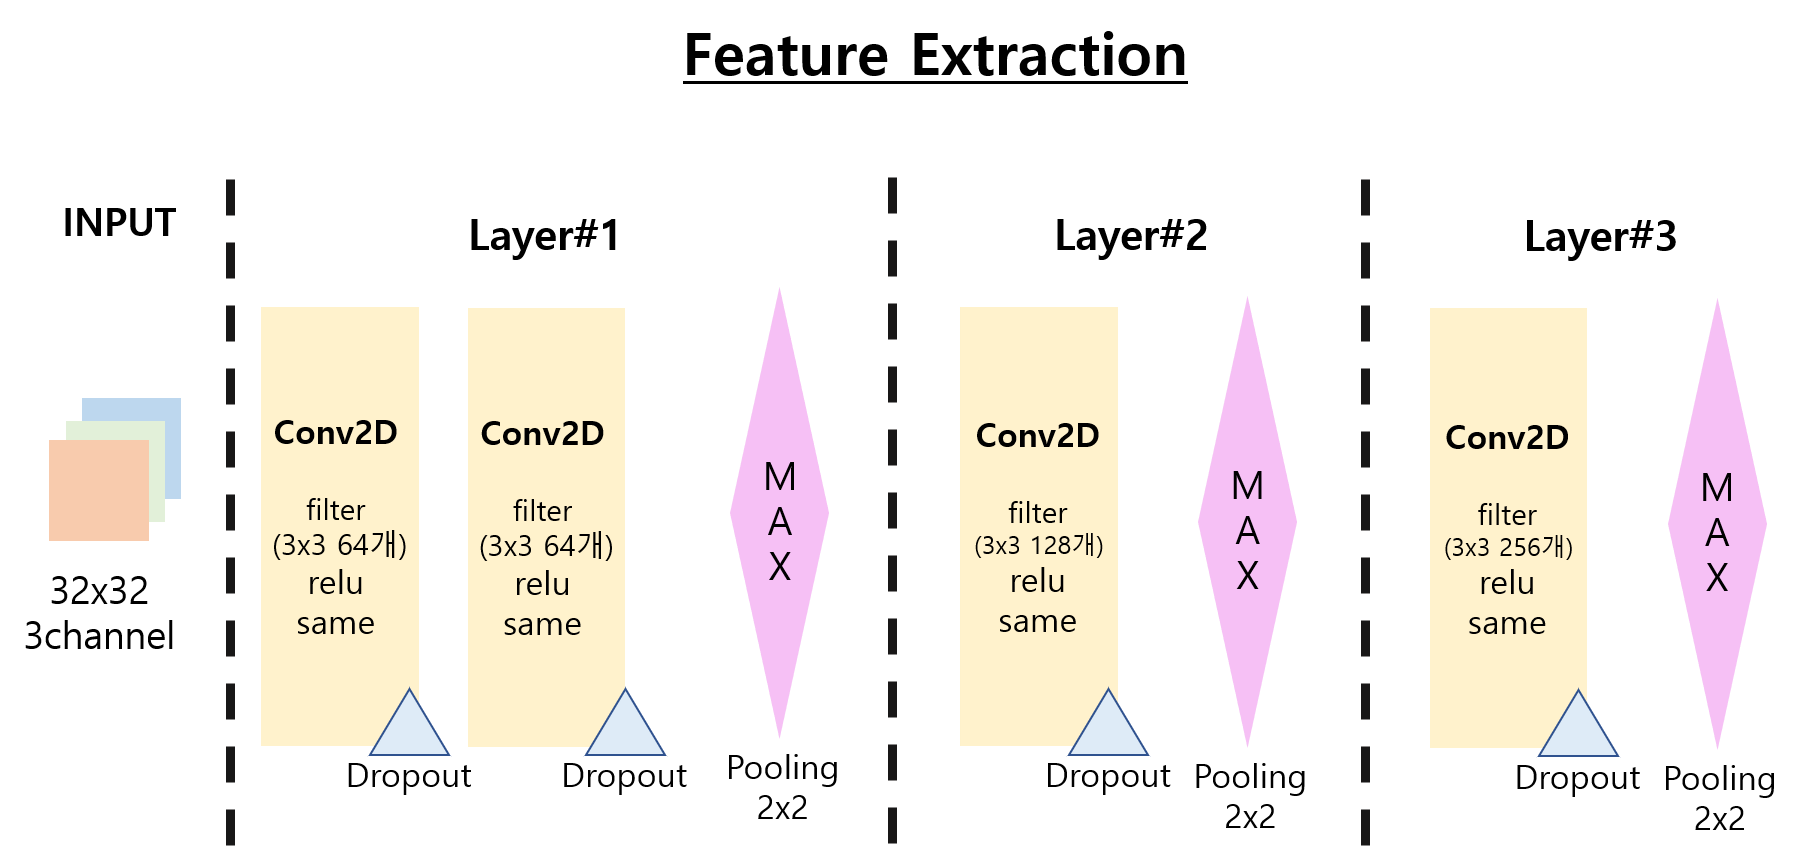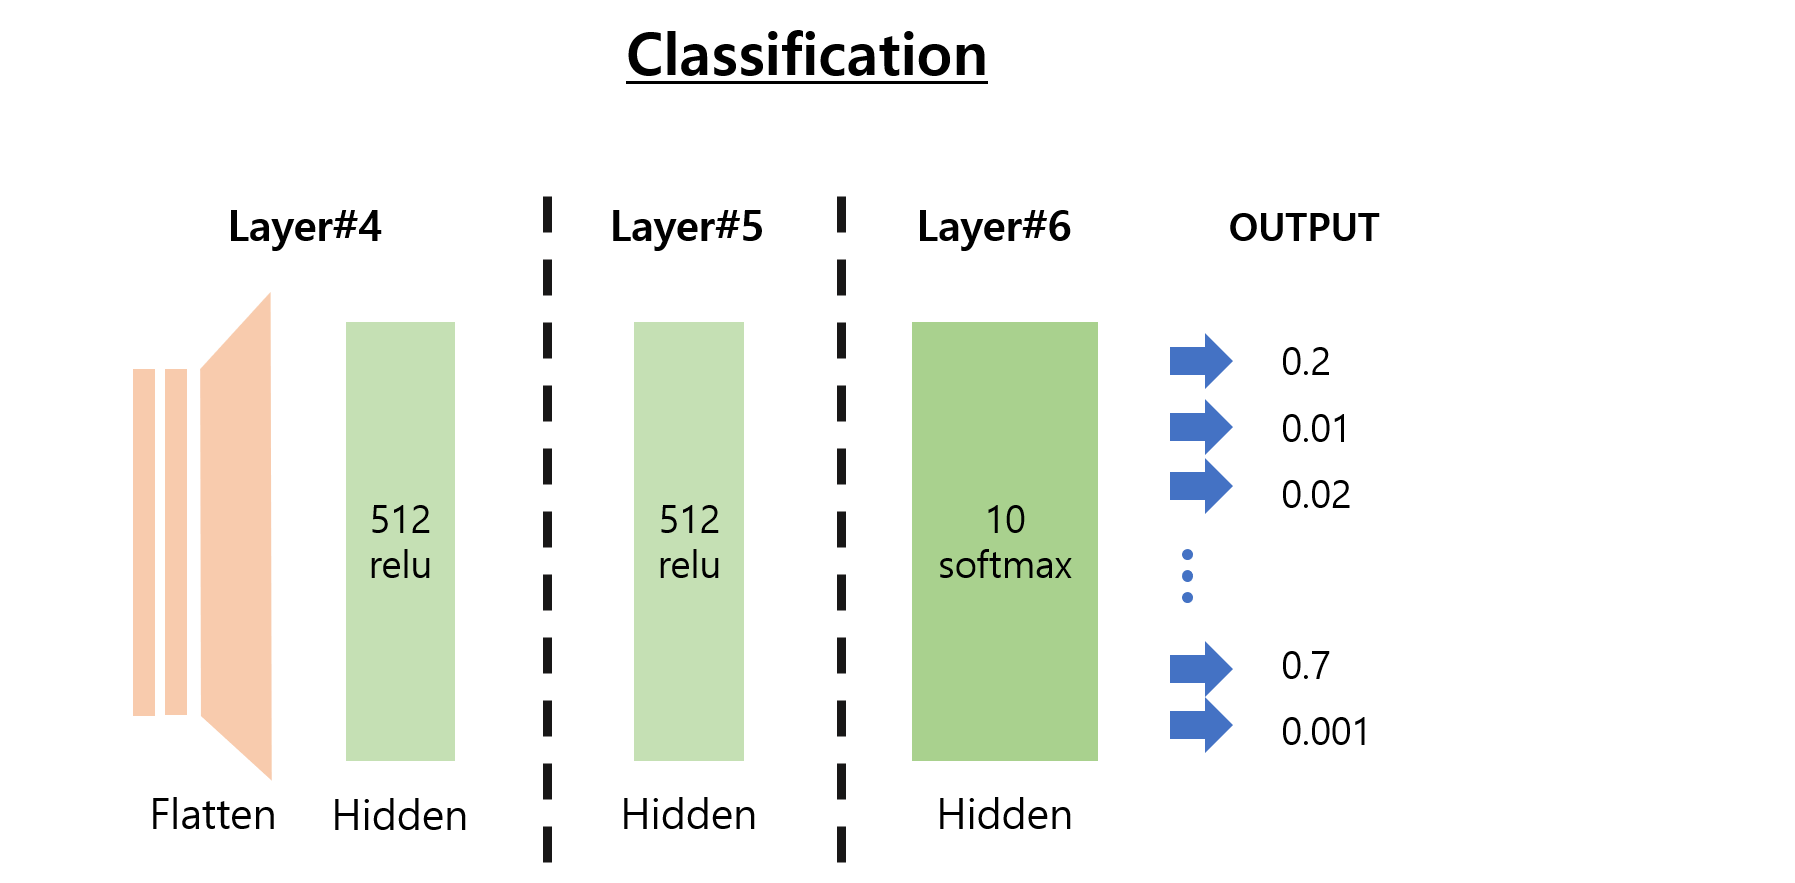

VGG16 구조 참고


https://bskyvision.com/504

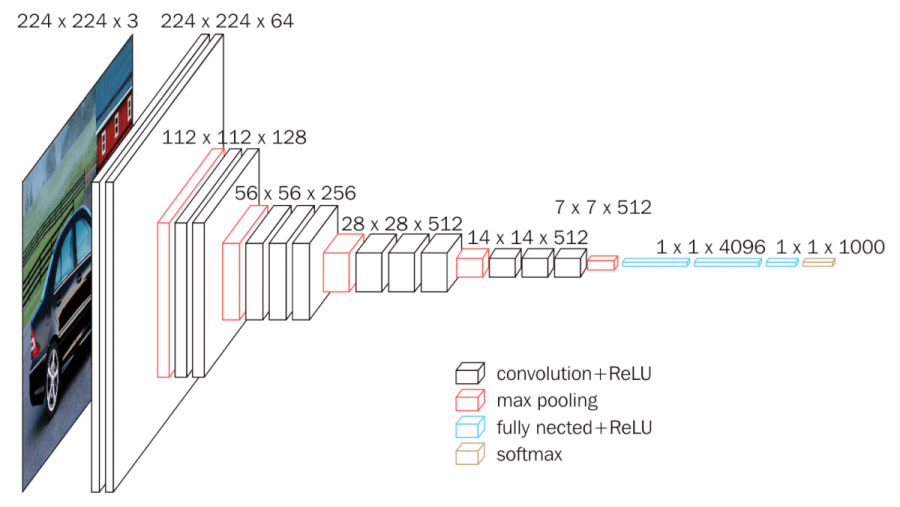

In [8]:

print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


In [47]:
# VGG16

model_cnn = Sequential()

# Conv Layer
model_cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu',
                     input_shape=(32, 32, 3)))
# dropout
model_cnn.add(Dropout(0.5))

# Conv Layer
model_cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# dropout
model_cnn.add(Dropout(0.5))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))





# Conv Layer
model_cnn.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# dropout
model_cnn.add(Dropout(0.5))

# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))



# Conv Layer
model_cnn.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# dropout
model_cnn.add(Dropout(0.5))

# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))



# Flatten
model_cnn.add(Flatten())

# FC
model_cnn.add(Dense(512,activation='relu'))

# FC
model_cnn.add(Dense(512,activation='relu'))

# Output
model_cnn.add(Dense(10,activation='softmax'))



In [41]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 128)      

CNN - LeNet model


In [17]:
# LeNet Model

model_cnn = Sequential()

# Conv Layer 1
model_cnn.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu',
                     input_shape=(32, 32, 3)))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

# Conv Layer 2
model_cnn.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


# Conv Layer 3
model_cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))



# Flatten
model_cnn.add(Flatten())

# FC
model_cnn.add(Dense(500,activation='relu'))

# dropout
model_cnn.add(Dropout(0.5))

# Output
model_cnn.add(Dense(10,activation='softmax'))




In [18]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [19]:
# Model Comfile

# gradient decent 추가
sgd = SGD(lr=0.001, decay=0.95 )

model_cnn.compile(loss='categorical_crossentropy', 
                  optimizer='sgd',
                  metrics='accuracy')

In [15]:
import keras.utils

one_hot_labels = keras.utils.to_categorical(y_train, num_classes=10)

In [20]:
hist = model_cnn.fit(X_train, one_hot_labels, epochs=80, batch_size=200, validation_split=0.2, shuffle=True)

Epoch 1/80
200/200 [==============================] - 3s 13ms/step - loss: 2.1940 - accuracy: 0.1879 - val_loss: 2.0051 - val_accuracy: 0.3048
Epoch 2/80
200/200 [==============================] - 2s 12ms/step - loss: 1.9580 - accuracy: 0.2894 - val_loss: 1.8250 - val_accuracy: 0.3658
Epoch 3/80
200/200 [==============================] - 2s 12ms/step - loss: 1.8156 - accuracy: 0.3435 - val_loss: 1.6982 - val_accuracy: 0.4060
Epoch 4/80
200/200 [==============================] - 2s 12ms/step - loss: 1.7068 - accuracy: 0.3824 - val_loss: 1.6011 - val_accuracy: 0.4290
Epoch 5/80
200/200 [==============================] - 2s 12ms/step - loss: 1.6239 - accuracy: 0.4096 - val_loss: 1.5443 - val_accuracy: 0.4526
Epoch 6/80
200/200 [==============================] - 2s 12ms/step - loss: 1.5626 - accuracy: 0.4298 - val_loss: 1.5052 - val_accuracy: 0.4565
Epoch 7/80
200/200 [==============================] - 2s 12ms/step - loss: 1.5124 - accuracy: 0.4478 - val_loss: 1.4358 - val_accuracy: 0.4857

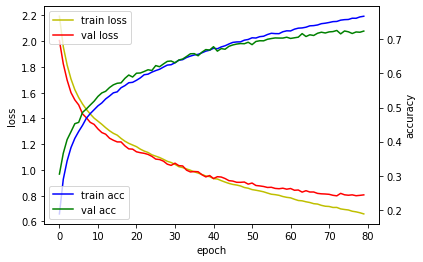

In [21]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [22]:
one_hot_y_test = keras.utils.to_categorical(y_test, num_classes=10)

model_cnn.evaluate(X_test, one_hot_y_test, batch_size=200)

50/50 [==============================] - 0s 6ms/step - loss: 0.8131 - accuracy: 0.7218


[0.813088595867157, 0.7218000292778015]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 고양이 / 정답: 고양이


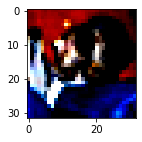

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 배 / 정답: 배


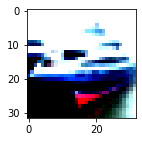

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 배 / 정답: 배


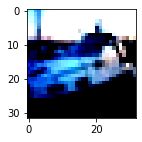

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 비행기 / 정답: 비행기


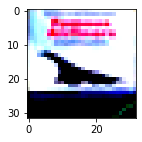

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 개구리 / 정답: 개구리


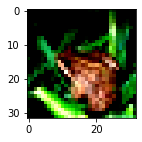

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 개구리 / 정답: 개구리


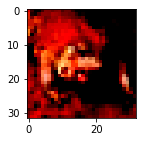

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 자동차 / 정답: 자동차


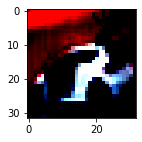

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 사슴 / 정답: 개구리


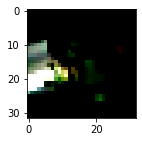

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 고양이 / 정답: 고양이


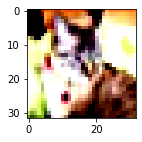

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 자동차 / 정답: 자동차


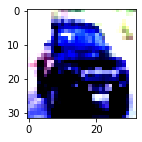

In [22]:
#모델 사용하기
# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model_cnn.predict(X_test[i].reshape(1,32, 32, 3))
  
  # 이미지 출력 
  plt.imshow(X_test[i].reshape(32, 32, 3))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(one_hot_y_test[i])])
  plt.show()